***Autor: Carlos Emiliano Mendoza Hernández***

## **Códigos en Python**

Escribe en Python un codigo que obtenga la factorización *LU* otro que obtenga la factorizacion *PLU* y otro que obtenga la
factorizacion de Cholesky de una matriz *A*. En caso de que la factorizacion no pueda realizarse sobre la matriz *A*, tu codigo 
debe arrojar que es lo que la matriz *A* no cumple.

Bibliotecas

In [35]:
import numpy as np
import matplotlib.pyplot as plt

Clase generadora de excepciones

In [36]:
class InvalidInputMatrix(Exception):
    """
    Exception raised for errors in the input matrix.
    """
    def __init__(self, message):
        super().__init__(message)

### LU

In [37]:
def lu_fact(A: np.ndarray, epsilon: float=1e-15) -> tuple[np.ndarray, np.ndarray]:
    """
    LU decomposition of a square matrix A. 
    Matrix A must be invertible.

    Example
    --------
    >>> A = np.array([[3, 1, 1], [-3, -3, 1], [3, -3, 6]])
    >>> lu_fact(A)
    (array([[ 1.,  0.,  0.],
            [-1.,  1.,  0.],
            [ 1.,  2.,  1.]]), 
    array([[ 3,  1,  1],
           [ 0, -2,  2],
           [ 0,  0,  1]]))

    Parameters
    ----------
    A (ndarray) : nxn coefficient matrix

    Returns
    ----------
    U (ndarray) : Upper triangular matrix
    L (ndarray) : Lower triangular matrix
    """
    m, n = np.shape(A)
    if m != n:
        raise InvalidInputMatrix('The matrix is not square.')
    L = np.zeros((n, n))
    U = np.copy(A)
    for j in range(n-1):
        if abs(U[j,j]) < epsilon:
            raise InvalidInputMatrix('LU decomposition cannot be done with this matrix.')
        for i in range(j+1,n):
            L[i,j] = U[i,j]/U[j,j]
            U[i] = U[i] - L[i,j]*U[j]
    L = L + np.eye(n)
    return L, U

Funciones auxiliares para PLU

In [38]:
def swap_rows(A: np.ndarray, i: int, j: int) -> np.ndarray:
    B = np.copy(A)
    A[i] = B[j]
    A[j] = B[i]
    return A

In [39]:
def max_index(v: np.array, j: int) -> int:
    v = np.abs(v)
    index = np.argmax(v[j:])
    index += j
    return index

### PLU

In [40]:
def plu_fact(A: np.ndarray, epsilon: float=1e-15) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    """ 
    PLU decomposition of a square matrix A

    Example
    --------
    >>> A = np.array([[0., -1., 4.], [2., 1., 1.], [1., 1., -2.]])
    >>> plu_fact(A)
    (array([[ 0. , 1. , 0.],
            [ 1. , 0. , 0.],
            [ 0. , 0. , 1.]]),
    array([[ 1. ,  0. ,  0. ],
           [ 0. ,  1. ,  0. ],
           [ 0.5, -0.5,  1. ]]),
    array([[ 2. ,  1. ,  1. ],
           [ 0. , -1. ,  4. ],
           [ 0. ,  0. , -0.5]]))

    Parameters
    ----------
    A (ndarray) : nxn coefficient matrix

    Returns
    -------
    P (ndarray) : Permutation matrix
    L (ndarray) : Lower triangular matrix
    U (ndarray) : Upper triangular matrix
    """
    m, n = np.shape(A)
    if m != n:
        raise InvalidInputMatrix('The matrix is not square.')
    P = np.eye(n)
    L = np.zeros((n, n))
    U = np.copy(A)
    for j in range(n-1):
        index = max_index(U[:,j], j)
        if abs(U[index, j]) < epsilon:
            raise InvalidInputMatrix('The matrix is non invertible.')
        P = swap_rows(P, j, index)
        L = swap_rows(L, j, index)
        U = swap_rows(U, j, index)
        for i in range(j+1,n):
            L[i,j] = (U[i,j])/(U[j,j])
            U[i] = U[i] - L[i,j]*U[j]
    L = L + np.eye(n)
    return P, L, U

### Cholesky

In [41]:
def cholesky_fact(A: np.ndarray, epsilon: float=1e-15) -> np.ndarray:
    """ 
    Cholesky decomposition of a symmetric positive definite matrix A

    Example
    --------
    >>> A = np.array([[4., -1., 1.], [-1., 4.25, 2.75], [1., 2.75, 3.5]])
    >>> cholesky_fact(A)
    array([[ 2. , -0.5,  0.5],
           [ 0. ,  2. ,  1.5],
           [ 0. ,  0. ,  1. ]])

    Parameters
    ----------
    A (ndarray) : nxn coefficient matrix

    Returns
    -------
    U (ndarray) : Upper triangular matrix
    """
    if not np.allclose(A, A.T):
        raise InvalidInputMatrix('The matrix is not symmetric.')
    m, n = np.shape(A)
    if m != n:
        raise InvalidInputMatrix('The matrix is not square.')
    U = np.copy(A)
    for i in range(n):
        if abs(U[i,i]) < epsilon:
            raise InvalidInputMatrix('The matrix is non positive definite or non invertible.')
        for j in range(i+1, n):
            U[j] = U[j] - U[i]*U[j,i]/U[i,i]
        U[i] = U[i]/np.sqrt(U[i,i])
    return U

## **Error en la factorización**

Se define el error en la factorización LU como

$$ ||A-LU|| $$

para la factorización PLU como

$$ ||PA-LU|| $$

y para la factorización de Cholesky como

$$ || A-U^TU || $$

In [42]:
def lu_error(A: np.ndarray, L: np.ndarray, U: np.ndarray) -> float:
    """ 
    Calculate the error of LU decomposition
    """
    return np.linalg.norm(A - L @ U)

In [43]:
def plu_error(A: np.ndarray, P: np.ndarray, L: np.ndarray, U: np.ndarray) -> float:
    """ 
    Calculate the error of PLU decomposition
    """
    return np.linalg.norm(P @ A - L @ U)

In [44]:
def cholesky_error(A: np.ndarray, U: np.ndarray) -> float:
    """ 
    Calculate the error of Cholesky decomposition
    """
    return np.linalg.norm(A - U.T @ U)

1. Considera un vector N con 50 entradas en orden ascendente, de tal forma que si $N=(n_1,...,n_{50})$, entonces $n_1=2, n_i-n_{i-1}=10$ y en consecuencia $n_{50} = 502$.

In [45]:
N = np.arange(2, 503, 10)
N

array([  2,  12,  22,  32,  42,  52,  62,  72,  82,  92, 102, 112, 122,
       132, 142, 152, 162, 172, 182, 192, 202, 212, 222, 232, 242, 252,
       262, 272, 282, 292, 302, 312, 322, 332, 342, 352, 362, 372, 382,
       392, 402, 412, 422, 432, 442, 452, 462, 472, 482, 492, 502])

2. Para cada $n_i$, crea una matriz $M_i$ de dimensiones $n \times n$, con valores aleatorios y calcula el error asociado a la factorización LU, PLU y Cholesky. Para Cholesky, en lugar de trabajar con las matrices $M_i$, trabaja con la matriz $N_i = M_i M^T_i$.

In [46]:
scale = 25 # scale factor of the random matrix

### Errores

In [47]:
lu_errors_arr = np.array([])
plu_errors_arr = np.array([])
cholesky_errors_arr = np.array([])
for n in N:
    M = scale*np.random.rand(n,n)
    L, U = lu_fact(M)
    lu_errors_arr = np.append(lu_errors_arr, lu_error(M, L, U))
    P, L, U = plu_fact(M)
    plu_errors_arr = np.append(plu_errors_arr, plu_error(M, P, L, U))
    A = M @ M.T
    U = cholesky_fact(A)
    cholesky_errors_arr = np.append(cholesky_errors_arr, cholesky_error(A, U))

In [48]:
lu_errors_arr

array([0.00000000e+00, 1.59206749e-13, 6.52125228e-13, 1.41624722e-12,
       1.61703921e-12, 3.88173885e-12, 1.34265954e-11, 8.44365348e-12,
       6.16295824e-12, 2.54384477e-11, 5.13105843e-10, 1.79469084e-10,
       9.25762700e-11, 2.71939012e-11, 1.45229731e-10, 7.80016875e-11,
       8.15905926e-10, 2.29782102e-10, 1.16057103e-10, 2.29321884e-10,
       5.61635749e-10, 1.47812706e-10, 1.61908407e-09, 4.20970867e-10,
       3.78081380e-10, 8.66732039e-10, 5.47466362e-10, 2.39224238e-10,
       5.63405056e-10, 4.15400843e-09, 5.68858266e-10, 4.08234515e-10,
       6.42475175e-10, 6.01760348e-10, 3.92737084e-09, 4.86215803e-10,
       4.86365395e-10, 1.37340379e-08, 1.05041715e-09, 3.77818211e-09,
       1.35296965e-09, 4.88223376e-10, 1.64985221e-09, 1.30943367e-09,
       1.43008195e-09, 1.98031587e-08, 1.36220829e-09, 1.20008554e-08,
       8.73825942e-10, 1.47689552e-09, 4.79594029e-09])

In [49]:
plu_errors_arr

array([0.00000000e+00, 1.69795173e-14, 5.03191439e-14, 9.71038650e-14,
       1.58078104e-13, 2.30621572e-13, 3.06961231e-13, 3.98474596e-13,
       4.73263336e-13, 6.16823919e-13, 7.19730344e-13, 8.57408431e-13,
       9.68685419e-13, 1.13717174e-12, 1.25677962e-12, 1.46777090e-12,
       1.61755122e-12, 1.80655701e-12, 1.99572007e-12, 2.17713235e-12,
       2.51179943e-12, 2.59887184e-12, 2.91429206e-12, 3.15722858e-12,
       3.38512107e-12, 3.69803039e-12, 3.76321716e-12, 4.10202403e-12,
       4.42106936e-12, 4.89022855e-12, 5.20411905e-12, 5.38824112e-12,
       5.52453017e-12, 5.93743589e-12, 6.23359795e-12, 6.84446753e-12,
       6.99324215e-12, 7.36896093e-12, 7.70152268e-12, 8.05951716e-12,
       8.41985891e-12, 9.23742961e-12, 9.76031382e-12, 9.99047558e-12,
       1.04211955e-11, 1.04592028e-11, 1.10622088e-11, 1.13316842e-11,
       1.20603583e-11, 1.26029444e-11, 1.33644432e-11])

In [50]:
cholesky_errors_arr

array([8.70233572e-15, 2.27941401e-12, 9.84294312e-12, 3.64649535e-11,
       4.96903827e-11, 9.34967631e-11, 1.39577068e-10, 2.05421011e-10,
       2.55015568e-10, 2.90935968e-10, 3.84861364e-10, 6.51848247e-10,
       7.97746624e-10, 9.28240826e-10, 1.05891433e-09, 1.22072486e-09,
       1.32242907e-09, 1.48618447e-09, 1.55650233e-09, 1.88011364e-09,
       2.18765069e-09, 2.97585332e-09, 3.62175727e-09, 4.26031084e-09,
       4.58426905e-09, 4.87463368e-09, 5.15826140e-09, 5.52590180e-09,
       5.77866796e-09, 6.12846442e-09, 6.40904493e-09, 6.94908424e-09,
       7.20468615e-09, 7.49545126e-09, 7.77306254e-09, 8.22837464e-09,
       8.88594327e-09, 8.87114400e-09, 9.18386692e-09, 9.52453700e-09,
       1.07703541e-08, 1.30548037e-08, 1.53942860e-08, 1.84512403e-08,
       1.97988099e-08, 2.11423779e-08, 2.22151203e-08, 2.34058317e-08,
       2.40639690e-08, 2.49675988e-08, 2.53713091e-08])

3. Grafica el error de las factorizaciones en funcion de la dimensión. No olvides poner etiquetas a tus gráficas y nombrar a los ejes.

In [51]:
import matplotlib.pyplot as plt

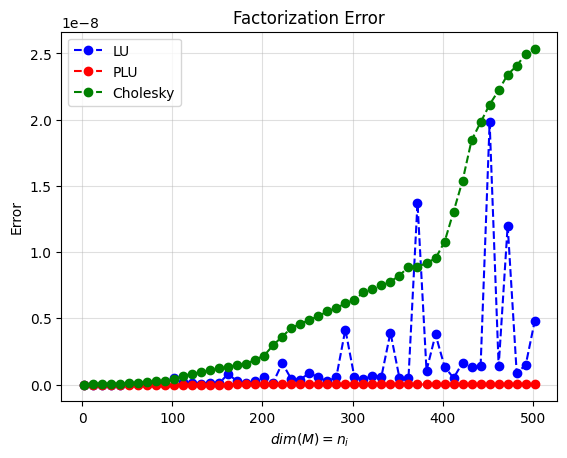

In [82]:
plt.plot(N, lu_errors_arr, 'b--o', label='LU')
plt.plot(N, plu_errors_arr, 'r--o', label='PLU')
plt.plot(N, cholesky_errors_arr, 'g--o', label='Cholesky')
plt.xlabel('$dim(M)=n_i$')
plt.ylabel('Error')
plt.title('Factorization Error')
plt.grid(alpha=0.4)
plt.legend()
plt.show()

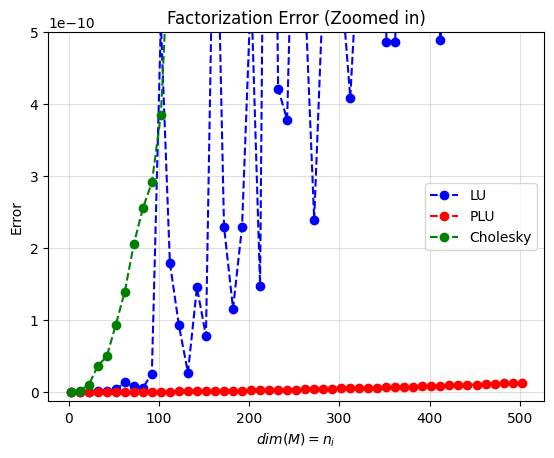

In [83]:
plt.plot(N, lu_errors_arr, 'b--o', label='LU')
plt.plot(N, plu_errors_arr, 'r--o', label='PLU')
plt.plot(N, cholesky_errors_arr, 'g--o', label='Cholesky')
plt.xlabel('$dim(M)=n_i$')
plt.ylabel('Error')
plt.ylim(-1.268565453120784e-11,5e-10)
plt.title('Factorization Error (Zoomed in)')
plt.grid(alpha=0.4)
plt.legend()
plt.show()

4. Como el error también depende de la matriz con la que se trabaja, lo anterior no es significativo, por lo que es mejor tomar una muestra para cada $n$ y obtener la media. Para cada $n_i$ del inciso anterior, calcula el error (de las factorizaciones LU, PLU y Cholesky) de 25 matrices y su correspondiente media y desviación estándar. La media de errores será el error asociado a la dimensión $n_i$. 

Para almacenar todos los errores se crea una matriz de tamaño 25x51 pre-asignada con ceros, donde la i-ésima columna contendrá los errores de 25 matrices aleatorias diferentes de dimensión $n_i$.

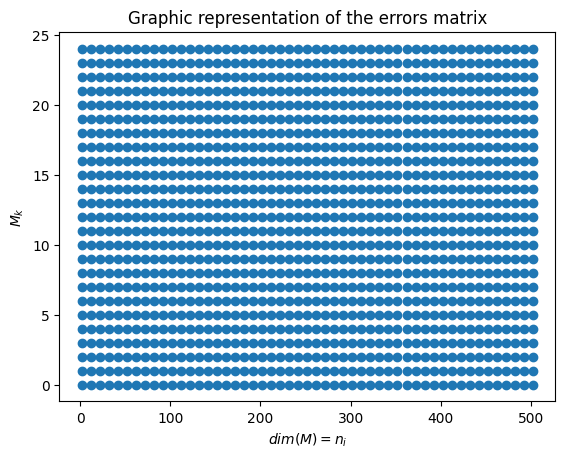

In [84]:
i = np.arange(25)
xx, yy = np.meshgrid(N, i)
plt.scatter(xx,yy)
plt.xlabel('$dim(M) = n_i$')
plt.ylabel('$M_k$')
plt.title('Graphic representation of the errors matrix')
plt.show()

Para calcular las medias de cada dimensión, bastará con calcular la media de cada columna de la matriz, y almacenarla en un nuevo arreglo.

### Media de errores

In [85]:
lu_errors_mat = np.zeros((25, len(N)))
plu_errors_mat = np.zeros((25, len(N)))
cholesky_errors_mat = np.zeros((25, len(N)))
for i in range(25):
    for j in range(len(N)):
        M = scale*np.random.rand(N[j], N[j])
        L, U = lu_fact(M)
        lu_errors_mat[i, j] = lu_error(M, L, U)
        P, L, U = plu_fact(M)
        plu_errors_mat[i, j] = plu_error(M, P, L, U)
        A = M @ M.T
        U = cholesky_fact(A)
        cholesky_errors_mat[i, j] = cholesky_error(A, U)

In [86]:
# Calculating mean for every n (dimension)
lu_means = np.mean(lu_errors_mat, axis=0)
lu_means

array([1.00364161e-15, 1.71304483e-13, 6.28409997e-13, 3.88905213e-12,
       1.11760322e-11, 1.33246775e-11, 1.20573159e-10, 1.97033470e-11,
       6.16797142e-11, 4.90790621e-11, 7.28927079e-11, 8.00008213e-11,
       1.48299572e-10, 1.02659572e-10, 2.98066075e-10, 2.14539566e-10,
       2.16802721e-10, 4.18772615e-10, 8.06035220e-10, 3.47524258e-10,
       1.23163942e-09, 4.36611516e-10, 6.91360813e-10, 9.60633743e-10,
       1.99305437e-09, 8.27826389e-10, 9.40093017e-10, 1.17529065e-09,
       6.31632230e-09, 6.21967355e-10, 2.09656255e-09, 3.61312037e-09,
       1.43154988e-09, 1.12098800e-09, 1.06953296e-09, 1.26581576e-08,
       1.81336989e-09, 1.62092114e-09, 2.98098400e-09, 3.45795138e-09,
       9.26882099e-09, 4.84355990e-09, 5.28360099e-09, 8.65156152e-09,
       3.32541766e-09, 7.90265587e-09, 1.05721054e-08, 5.16320023e-09,
       4.52619673e-09, 4.62517970e-09, 2.40348807e-09])

In [87]:
# Calculating mean for every dimension
plu_means = np.mean(plu_errors_mat, axis=0)
plu_means

array([3.55271368e-17, 1.95993733e-14, 5.37308692e-14, 1.01661556e-13,
       1.58436289e-13, 2.32191666e-13, 3.06068564e-13, 3.95467870e-13,
       4.96691088e-13, 6.08037094e-13, 7.21833775e-13, 8.50106338e-13,
       9.92318038e-13, 1.13620832e-12, 1.29276254e-12, 1.45291150e-12,
       1.62128505e-12, 1.79994388e-12, 2.01746863e-12, 2.19173245e-12,
       2.40113014e-12, 2.62479292e-12, 2.92944779e-12, 3.18641017e-12,
       3.44904313e-12, 3.71841264e-12, 3.79240191e-12, 4.10780102e-12,
       4.41689924e-12, 4.76679962e-12, 5.07035721e-12, 5.42243161e-12,
       5.48525771e-12, 5.75977871e-12, 6.16701890e-12, 6.60784498e-12,
       6.98275415e-12, 7.37627046e-12, 7.71239416e-12, 8.09856075e-12,
       8.54796827e-12, 9.03377085e-12, 9.51841951e-12, 1.00378067e-11,
       1.05241935e-11, 1.05214491e-11, 1.10134418e-11, 1.14745422e-11,
       1.20858266e-11, 1.26308678e-11, 1.31891615e-11])

In [88]:
# Calculating mean for every dimension
cholesky_means = np.mean(cholesky_errors_mat, axis=0)
cholesky_means

array([1.00034825e-13, 2.99165670e-12, 1.18862090e-11, 3.10034566e-11,
       5.10296331e-11, 9.05813770e-11, 1.42175781e-10, 2.02623007e-10,
       2.52556346e-10, 3.15600172e-10, 4.41159567e-10, 6.69553305e-10,
       8.15330567e-10, 9.45357438e-10, 1.06502051e-09, 1.20756665e-09,
       1.33173859e-09, 1.43703772e-09, 1.57136591e-09, 1.86124264e-09,
       2.29105739e-09, 2.95977427e-09, 3.63159581e-09, 4.22469718e-09,
       4.56086486e-09, 4.86116740e-09, 5.14163432e-09, 5.54952490e-09,
       5.82319923e-09, 6.13879204e-09, 6.45829650e-09, 6.89030230e-09,
       7.24925156e-09, 7.58636143e-09, 7.89909469e-09, 8.39488711e-09,
       8.64755565e-09, 9.07201811e-09, 9.36093511e-09, 9.62135353e-09,
       1.09608660e-08, 1.29036864e-08, 1.53434906e-08, 1.81011139e-08,
       2.00069147e-08, 2.13504343e-08, 2.22384461e-08, 2.34513340e-08,
       2.41154744e-08, 2.48159652e-08, 2.55444035e-08])

5. Grafica la media de errores asociados asociados a la factorización LU, PLU y Cholesky, en función de la dimensión de una sola gráfica. ¿Observas alguna tendencia conforme aumenta la dimensión?

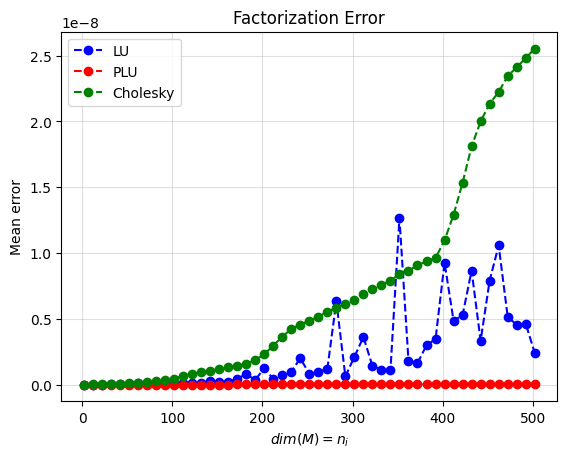

In [89]:
plt.plot(N, lu_means, 'b--o', label='LU')
plt.plot(N, plu_means, 'r--o', label='PLU')
plt.plot(N, cholesky_means, 'g--o', label='Cholesky')
plt.xlabel('$dim(M)=n_i$')
plt.ylabel('Mean error')
plt.title('Factorization Error')
plt.grid(alpha=0.4)
plt.legend()
plt.show()

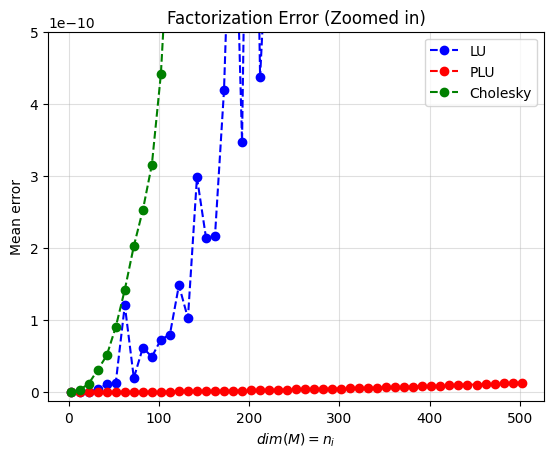

In [94]:
plt.plot(N, lu_means, 'b--o', label='LU')
plt.plot(N, plu_means, 'r--o', label='PLU')
plt.plot(N, cholesky_means, 'g--o', label='Cholesky')
plt.xlabel('$dim(M)=n_i$')
plt.ylabel('Mean error')
plt.ylim(-1.268565453120784e-11,5e-10)
plt.title('Factorization Error (Zoomed in)')
plt.grid(alpha=0.4)
plt.legend()
plt.show()

En la gráfica se puede observar que, conforme aumenta la dimensión de las matrices, la media de los errores también tiende a crecer. Este comportamiento es especialmente notorio en algoritmos como el de Cholesky y el de LU, donde el incremento en la media de errores se debe principalmente a la acumulación de errores de redondeo conforme se realizan más operaciones aritméticas. Estos algoritmos son más susceptibles a la inestabilidad numérica, particularmente en matrices de gran tamaño o mal condicionadas.

En contraste, el algoritmo PLU presenta un incremento en la media de los errores mucho menos significativo. Esto se debe a la inclusión de la pivotación parcial, que reorganiza las filas de la matriz en función de la magnitud de los elementos, asegurando que los coeficientes diagonales sean suficientemente grandes. Este proceso de permutación ayuda a mitigar la propagación de errores durante las eliminaciones, lo que hace que el PLU sea más robusto frente a la inestabilidad numérica que afecta a otros métodos, especialmente en matrices de mayor dimensión.

6. Grafica la desviación estándar para la factorización LU y PLU en función de la dimensión en una sola gráfica. ¿Observas alguna tendencia conforme aumenta la dimensión?

In [90]:
lu_std = np.std(lu_errors_mat, axis=0)
lu_std

array([4.16834916e-15, 2.24919704e-13, 4.67975180e-13, 4.24803270e-12,
       1.60563549e-11, 2.24485912e-11, 4.65775948e-10, 1.95250828e-11,
       7.56406401e-11, 6.28137257e-11, 5.80771962e-11, 9.97267121e-11,
       2.39108684e-10, 9.00742149e-11, 5.47930478e-10, 2.86534681e-10,
       3.31495031e-10, 6.11793480e-10, 2.63353546e-09, 5.30892386e-10,
       2.77960607e-09, 5.68445324e-10, 1.06136599e-09, 1.83136952e-09,
       3.37337843e-09, 9.43842540e-10, 1.13658836e-09, 2.35050330e-09,
       2.47700599e-08, 4.29589326e-10, 2.26222856e-09, 7.21032918e-09,
       2.02496103e-09, 1.32535598e-09, 6.45475545e-10, 4.64761800e-08,
       2.50227438e-09, 1.15841018e-09, 5.28650110e-09, 5.57427558e-09,
       2.36405662e-08, 5.64291730e-09, 7.74393302e-09, 2.20426460e-08,
       4.72499141e-09, 1.41742903e-08, 2.93571455e-08, 1.31645204e-08,
       7.44413260e-09, 5.66423641e-09, 2.21263423e-09])

In [91]:
plu_std = np.std(plu_errors_mat, axis=0)
plu_std

array([1.74046714e-16, 2.84504411e-15, 3.46381923e-15, 5.87452936e-15,
       6.05457797e-15, 9.76134676e-15, 9.17151857e-15, 1.17888292e-14,
       1.50822695e-14, 1.59727764e-14, 1.47143718e-14, 2.03814358e-14,
       2.34958171e-14, 2.22541456e-14, 3.90463158e-14, 3.52606520e-14,
       3.84992320e-14, 4.00982122e-14, 4.93872195e-14, 4.68743194e-14,
       3.89061888e-14, 5.18171148e-14, 5.87389638e-14, 6.27272518e-14,
       6.53165361e-14, 8.47400566e-14, 5.82138246e-14, 5.48548636e-14,
       6.76226475e-14, 7.75658570e-14, 7.48071770e-14, 8.39880592e-14,
       7.00240517e-14, 7.42686961e-14, 7.81771807e-14, 8.92310047e-14,
       1.10622745e-13, 1.16610964e-13, 1.14080566e-13, 1.28545918e-13,
       1.15142406e-13, 1.40646236e-13, 1.46088858e-13, 1.80869986e-13,
       1.40844773e-13, 1.46828759e-13, 1.48446262e-13, 1.79230470e-13,
       1.70043126e-13, 1.34581266e-13, 1.52732215e-13])

In [92]:
cholesky_std = np.std(cholesky_errors_mat, axis=0)
cholesky_std

array([7.56758417e-14, 5.64859196e-13, 2.14659756e-12, 2.59376448e-12,
       3.50229928e-12, 4.58558058e-12, 5.16659798e-12, 1.12012446e-11,
       1.55919230e-11, 1.74299337e-11, 2.67274697e-11, 2.34011911e-11,
       1.84418161e-11, 2.07605274e-11, 3.18651226e-11, 2.99072460e-11,
       2.87186399e-11, 2.64252655e-11, 3.43391561e-11, 4.73250147e-11,
       8.21578456e-11, 7.43631393e-11, 4.34632046e-11, 4.36682727e-11,
       3.30843573e-11, 3.70312721e-11, 4.23361896e-11, 5.47573575e-11,
       4.58998956e-11, 8.04916878e-11, 8.89722096e-11, 9.24745377e-11,
       1.25406714e-10, 1.44173975e-10, 1.39198870e-10, 1.70693662e-10,
       1.85907081e-10, 2.03131036e-10, 1.39243824e-10, 2.06288135e-10,
       2.26950416e-10, 3.92672322e-10, 2.61851718e-10, 2.93800721e-10,
       1.66535869e-10, 1.93992334e-10, 1.32477865e-10, 1.79440010e-10,
       1.74717659e-10, 2.01337640e-10, 1.31361725e-10])

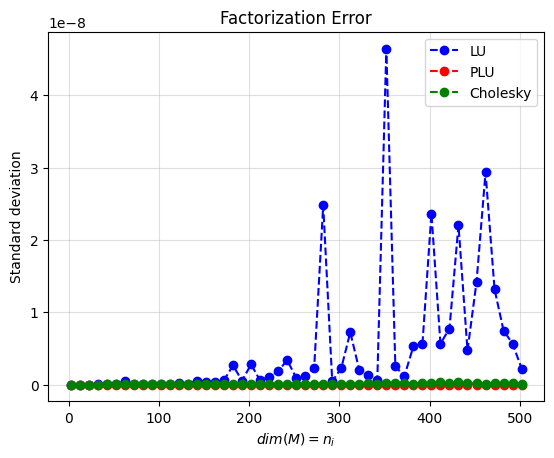

In [93]:
plt.plot(N, lu_std, 'b--o', label='LU')
plt.plot(N, plu_std, 'r--o', label='PLU')
plt.plot(N, cholesky_std, 'g--o', label='Cholesky')
plt.xlabel('$dim(M)=n_i$')
plt.ylabel('Standard deviation')
plt.title('Factorization Error')
plt.grid(alpha=0.4)
plt.legend()
plt.show()

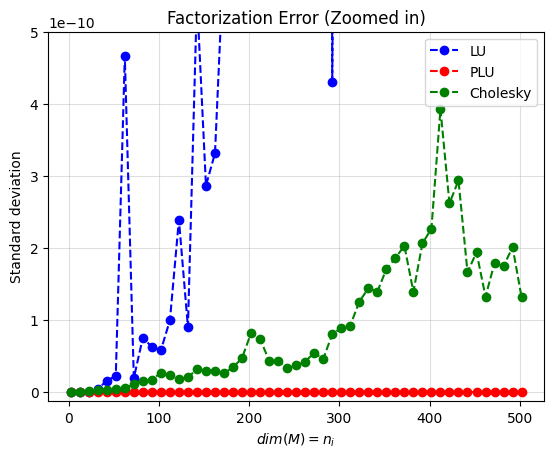

In [95]:
plt.plot(N, lu_std, 'b--o', label='LU')
plt.plot(N, plu_std, 'r--o', label='PLU')
plt.plot(N, cholesky_std, 'g--o', label='Cholesky')
plt.xlabel('$dim(M)=n_i$')
plt.ylabel('Standard deviation')
plt.ylim(-1.268565453120784e-11,5e-10)
plt.title('Factorization Error (Zoomed in)')
plt.grid(alpha=0.4)
plt.legend()
plt.show()

En la gráfica, se observa que la desviación estándar de los errores aumenta considerablemente conforme crece la dimensión de las matrices. Este fenómeno es especialmente marcado en el algoritmo LU, donde la desviación estándar es significativamente grande. Esto indica una mayor variabilidad en los errores, lo que sugiere que el algoritmo LU es más sensible a fluctuaciones en los datos y tiende a generar resultados menos consistentes cuando se trabaja con matrices más grandes o mal condicionadas.

Del mismo modo, el algoritmo de Cholesky, aunque más susceptible a la acumulación de errores en comparación con PLU, presenta una desviación estándar relativamente baja, lo que sugiere que los errores en este método son más consistentes y predecibles que en el algoritmo LU.

7. La ***exactitud*** de un algoritmo se refiere a que tan cercana es la solución que da con respecto a la solución teórica. A partir de la gráfica anterior, ¿cuál dirías que es el algoritmo con mayor exactitud?

Con base en las gráficas anteriores, parece que el algoritmo PLU presenta la mayor exactitud. Esto se debe a que muestra tanto una media de errores baja como una desviación estándar pequeña, lo que indica que las soluciones obtenidas son consistentemente cercanas a la solución teórica y menos propensas a fluctuaciones significativas. La inclusión de la pivotación parcial en PLU ayuda a mantener este nivel de precisión, especialmente en matrices de mayor dimensión.

Por otro lado, aunque el algoritmo de Cholesky también muestra una baja desviación estándar, su media de errores es mayor en comparación con PLU, lo que sugiere que, si bien sus errores son consistentes, tienden a estar un poco más alejados de la solución teórica.

El algoritmo LU, en cambio, es el menos exacto de los tres, ya que presenta tanto una media de errores más alta como una mayor desviación estándar, lo que indica no solo que sus soluciones están más alejadas de la solución teórica, sino que también son más variables.

En resumen, el algoritmo PLU se destaca como el más exacto en esta comparación.

8. La ***precisión*** de un algoritmo se refiere a que tan repetitiva es una medición, por lo que podemos asociar una desviación estándar pequeña a una mejor precisión, puesto que el error es similar siempre. ¿Cuál dirías que es el algoritmo más preciso?

Dado que la precisión de un algoritmo se refiere a qué tan consistentes y repetitivas son sus mediciones, y una desviación estándar pequeña indica una mayor precisión, el algoritmo más preciso es PLU. Según la gráfica, PLU presenta la desviación estándar más baja, lo que significa que sus errores son consistentes y las soluciones obtenidas tienen una baja variabilidad, lo que refleja una alta repetitividad en los resultados.

Aunque el algoritmo de Cholesky también tiene una desviación estándar relativamente baja, sigue siendo mayor que la de PLU, lo que indica que es menos preciso en comparación.

El algoritmo LU, con la desviación estándar más alta, es el menos preciso, ya que sus resultados muestran una mayor variabilidad, es decir, menos consistencia entre las mediciones.

En resumen, el algoritmo más preciso es PLU debido a que presenta la desviación estándar más baja, lo que indica una mayor consistencia en los resultados obtenidos.

## **Estabilidad en la factorización PLU**

En las graficas anteriores, pudiste obtener que en algunos casos, la factorización LU se comportaba mejor que PLU. Esto se debe al hecho de que las matrices con las que se esta haciendo el análisis de errores, son muy específicas, ya que el comando
con el que se crean, hace que las entradas tengan una distribucion normal entre cero y uno.

1. Repite lo que se pide en el ejercicio 4 para matrices aleatorias que cumplan que el segundo renglón de $M_i$ sea igual al primer renglón, salvo en la segunda entrada donde

$$[M_i]_{22} = [M_i]_{12}+\epsilon$$

con $\epsilon \leq 10^{-15}$

In [96]:
epsilon = 1e-14 # 1e-15 causa problemas de precisión

### Prueba de estabilidad

In [97]:
lu_errors_mat_2 = np.zeros((25, len(N)))
plu_errors_mat_2 = np.zeros((25, len(N)))
for i in range(25):
    for j in range(len(N)):
        M = scale*np.random.rand(N[j], N[j])
        M[0] = np.copy(M[1])
        M[1,1] += epsilon
        L, U = lu_fact(M)
        lu_errors_mat_2[i, j] = lu_error(M, L, U)
        P, L, U = plu_fact(M)
        plu_errors_mat_2[i, j] = plu_error(M, P, L, U)

In [98]:
# Calculating mean for every n (dimension)
lu_means_2 = np.mean(lu_errors_mat_2, axis=0)
lu_means_2

array([0.00000000e+00, 4.43564809e-13, 1.02117096e-12, 3.02601724e-12,
       6.95219749e-12, 9.53535412e-12, 2.16978229e-11, 5.38629978e-10,
       1.17467744e-10, 1.76844384e-10, 6.17986209e-11, 6.53368120e-10,
       1.14122047e-10, 2.78348580e-09, 2.10808594e-10, 2.79390280e-10,
       1.30112860e-10, 2.62318654e-10, 5.64211217e-10, 4.04149756e-10,
       3.81403579e-10, 5.62837058e-10, 7.22786601e-10, 1.37803757e-09,
       1.18231439e-09, 6.18668835e-10, 2.79705098e-09, 6.29285800e-10,
       1.07172804e-09, 1.08586745e-08, 1.14064002e-09, 4.90449667e-09,
       8.12309389e-10, 1.11049461e-09, 3.18328410e-09, 1.72229465e-09,
       1.12891424e-09, 3.76896623e-09, 9.01657674e-09, 6.55478589e-09,
       2.26497111e-09, 3.77396734e-09, 1.79970565e-09, 4.35322353e-09,
       4.74629720e-09, 4.23515702e-09, 4.13461526e-09, 9.45312952e-09,
       2.92125535e-09, 6.72994067e-09, 4.59499552e-09])

In [99]:
# Calculating mean for every n (dimension)
plu_means_2 = np.mean(plu_errors_mat_2, axis=0)
plu_means_2

array([0.00000000e+00, 2.01223899e-14, 5.42574993e-14, 1.00526773e-13,
       1.55945027e-13, 2.28544283e-13, 3.09140942e-13, 3.94771901e-13,
       4.99569535e-13, 6.06219060e-13, 7.29976821e-13, 8.53831964e-13,
       9.90627132e-13, 1.13020739e-12, 1.28157106e-12, 1.46213231e-12,
       1.61380692e-12, 1.79828855e-12, 2.03168062e-12, 2.18426754e-12,
       2.39674528e-12, 2.63285795e-12, 2.93616138e-12, 3.21948544e-12,
       3.46652677e-12, 3.71592950e-12, 3.79353020e-12, 4.10582739e-12,
       4.40679563e-12, 4.76967972e-12, 5.09947294e-12, 5.44109657e-12,
       5.44132327e-12, 5.82518152e-12, 6.15203973e-12, 6.61159950e-12,
       6.95193441e-12, 7.34401888e-12, 7.62928682e-12, 8.12572418e-12,
       8.55600266e-12, 9.01634379e-12, 9.52561250e-12, 9.98149593e-12,
       1.05351619e-11, 1.04407872e-11, 1.09792303e-11, 1.14723157e-11,
       1.22111332e-11, 1.26539782e-11, 1.32437276e-11])

2. Grafica los errores y las desviaciones estándar de forma análoga al ejercicio anterior y responde a las preguntas relacionadas con exactitud y precisión.

In [100]:
lu_std_2 = np.std(lu_errors_mat_2, axis=0)
lu_std_2

array([0.00000000e+00, 8.02421569e-13, 1.35183882e-12, 2.16803524e-12,
       1.08027929e-11, 1.21997312e-11, 5.10048950e-11, 2.41326978e-09,
       3.05900133e-10, 6.07971354e-10, 8.63569291e-11, 2.85376442e-09,
       1.73155769e-10, 1.25610951e-08, 2.77338953e-10, 4.95103111e-10,
       9.62991647e-11, 4.82753547e-10, 9.59559684e-10, 4.86083825e-10,
       5.80749195e-10, 5.65395922e-10, 1.59145314e-09, 4.42341084e-09,
       1.87992804e-09, 8.09331202e-10, 1.08160697e-08, 8.38017508e-10,
       1.65702330e-09, 3.85894159e-08, 8.42375742e-10, 1.54623941e-08,
       5.87769566e-10, 1.54024238e-09, 1.01644985e-08, 1.49245767e-09,
       1.01428784e-09, 7.08974195e-09, 2.47621753e-08, 1.60163800e-08,
       3.07657163e-09, 8.28551536e-09, 1.35450064e-09, 8.35128716e-09,
       5.97507268e-09, 5.18594905e-09, 7.04774504e-09, 3.00963083e-08,
       3.25966324e-09, 9.48665164e-09, 9.04409158e-09])

In [101]:
plu_std_2 = np.std(plu_errors_mat_2, axis=0)
plu_std_2

array([0.00000000e+00, 2.29262145e-15, 2.99314492e-15, 5.89822254e-15,
       5.14239135e-15, 9.75235320e-15, 9.09710003e-15, 1.19159138e-14,
       1.82298508e-14, 1.96016718e-14, 1.97440413e-14, 2.91214631e-14,
       2.97349589e-14, 1.96351729e-14, 1.59688716e-14, 2.88525111e-14,
       3.51100980e-14, 2.94124410e-14, 3.66163242e-14, 3.59866022e-14,
       3.35430567e-14, 5.25197197e-14, 5.11942195e-14, 6.15422052e-14,
       6.74463283e-14, 5.69624476e-14, 5.38962122e-14, 7.00794371e-14,
       7.56632511e-14, 8.77399863e-14, 7.88885626e-14, 8.95960799e-14,
       7.72084901e-14, 1.02662352e-13, 9.81313034e-14, 6.58863103e-14,
       1.02964989e-13, 1.08685278e-13, 1.31074934e-13, 1.48037662e-13,
       1.34817581e-13, 9.01626592e-14, 1.54120702e-13, 1.31025949e-13,
       1.57569021e-13, 1.55191896e-13, 1.16489483e-13, 1.96490161e-13,
       1.83615695e-13, 2.02866974e-13, 1.88351695e-13])

Medias

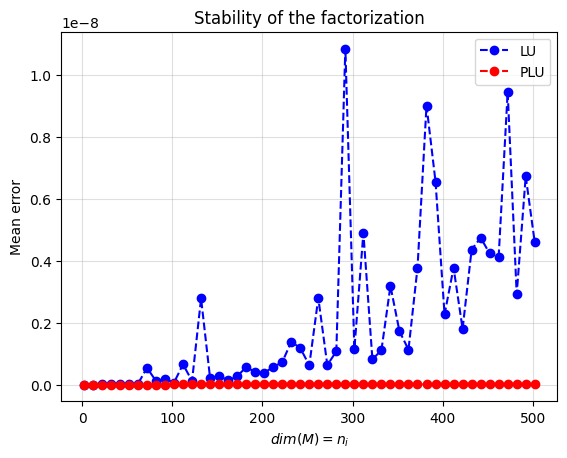

In [102]:
plt.plot(N, lu_means_2, 'b--o', label='LU')
plt.plot(N, plu_means_2, 'r--o', label='PLU')
plt.xlabel('$dim(M)=n_i$')
plt.ylabel('Mean error')
plt.title('Stability of the factorization')
plt.grid(alpha=0.4)
plt.legend()
plt.show()

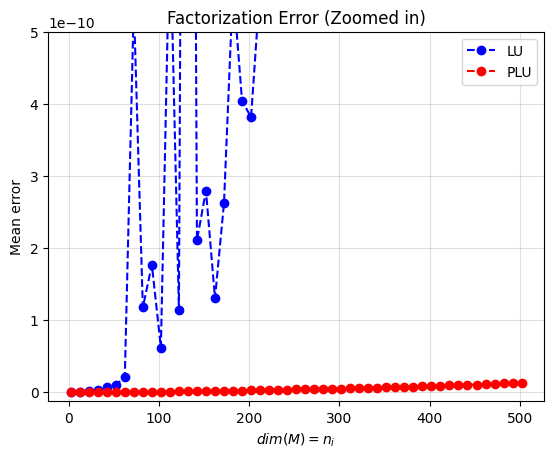

In [103]:
plt.plot(N, lu_means_2, 'b--o', label='LU')
plt.plot(N, plu_means_2, 'r--o', label='PLU')
plt.xlabel('$dim(M)=n_i$')
plt.ylabel('Mean error')
plt.title('Stability of the factorization')
plt.ylim(-1.268565453120784e-11,5e-10)
plt.title('Factorization Error (Zoomed in)')
plt.grid(alpha=0.4)
plt.legend()
plt.show()

Desviación estándar

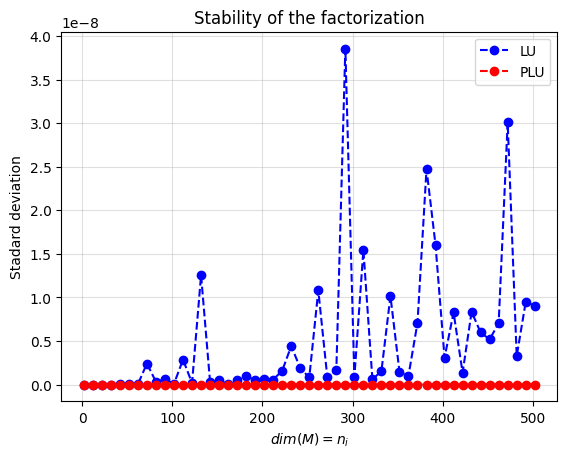

In [104]:
plt.plot(N, lu_std_2, 'b--o', label='LU')
plt.plot(N, plu_std_2, 'r--o', label='PLU')
plt.xlabel('$dim(M)=n_i$')
plt.ylabel('Stadard deviation')
plt.title('Stability of the factorization')
plt.grid(alpha=0.4)
plt.legend()
plt.show()

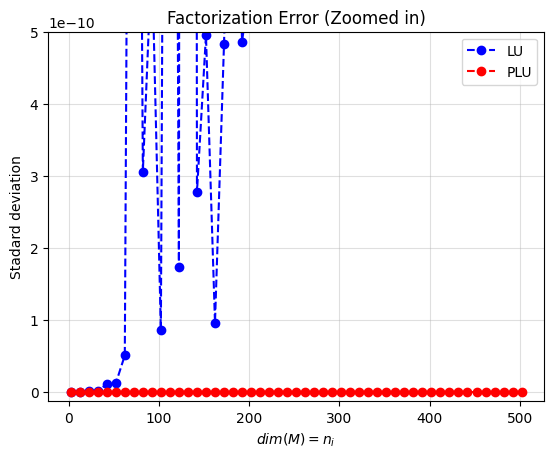

In [105]:
plt.plot(N, lu_std_2, 'b--o', label='LU')
plt.plot(N, plu_std_2, 'r--o', label='PLU')
plt.xlabel('$dim(M)=n_i$')
plt.ylabel('Stadard deviation')
plt.title('Stability of the factorization')
plt.ylim(-1.268565453120784e-11,5e-10)
plt.title('Factorization Error (Zoomed in)')
plt.grid(alpha=0.4)
plt.legend()
plt.show()

A partir de la gráfica anterior, ¿cuál dirías que es el algoritmo con mayor exactitud?

PLU, de nuevo, las medias fueron las más cercanas al valor ideal (0).ya que las medias de sus errores son las más cercanas al valor ideal (0). Esto sugiere que, además de ser consistente en sus mediciones, PLU produce resultados que están más cerca de la solución teórica correcta, lo que lo convierte en el algoritmo con la mejor exactitud.

¿Cuál dirías que es el algoritmo más preciso?

En cuanto a precisión, se observa que PLU tiene la desviación estándar más baja, lo que indica que los errores generados por este algoritmo son muy consistentes y muestran poca variabilidad. Esto significa que las soluciones que proporciona son repetitivas y no fluctúan significativamente entre diferentes ejecuciones.